Customer Attrition or Churn refers to when a customer terminates his relationship with a company. Customer churn leads to lost revenue and the marketing costs involved with replacing these customers. Analysing the data and gaining an understanding of reasons customer churn can be useful to estimate the risk associated with individual customers and to design a data driven retention strategy. Various Industries which face customer churn are Telephone Service company, Internet service provider, pay TV companies, Financial services firms and online businesses.
Churn rate can be simply calculated by dividing the number of customer cancellations within a time period by the number of active customers at the start of that period. Churn rate can also provide a benchmark against which to measure the impact of a model. A churn prediction model can measure the immediate or future risks of customer churn.


## Data Overview

In [18]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib.ticker as mtick
import seaborn as sns

import os
print(os.listdir("../input"))

['telco-customer-churn']


In [19]:
#reading data
df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [20]:
#first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
# total rows and columns
df.shape

(7043, 21)

In [22]:
#column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
#getting data summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [24]:
#column types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Data Preparation

In [25]:
# "TotalCharges" is numeric, but the data type is 'object'
# It needs to be converted to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [26]:
#changing vlues of SeniorCitizen from 0 and 1 to Yes and No
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [27]:
# Checking the number of missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [28]:
# There are 11 missing records in 'TotalCharges'. We will drop these missing records
# Dropping the missing records
df.dropna(inplace=True)

In [29]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [30]:
# Dropping 'customerID' column
df.drop('customerID', axis=1, inplace=True)

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
# Converting target variable to binary number
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## EDA

In [34]:
#converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


### 1. Correlation

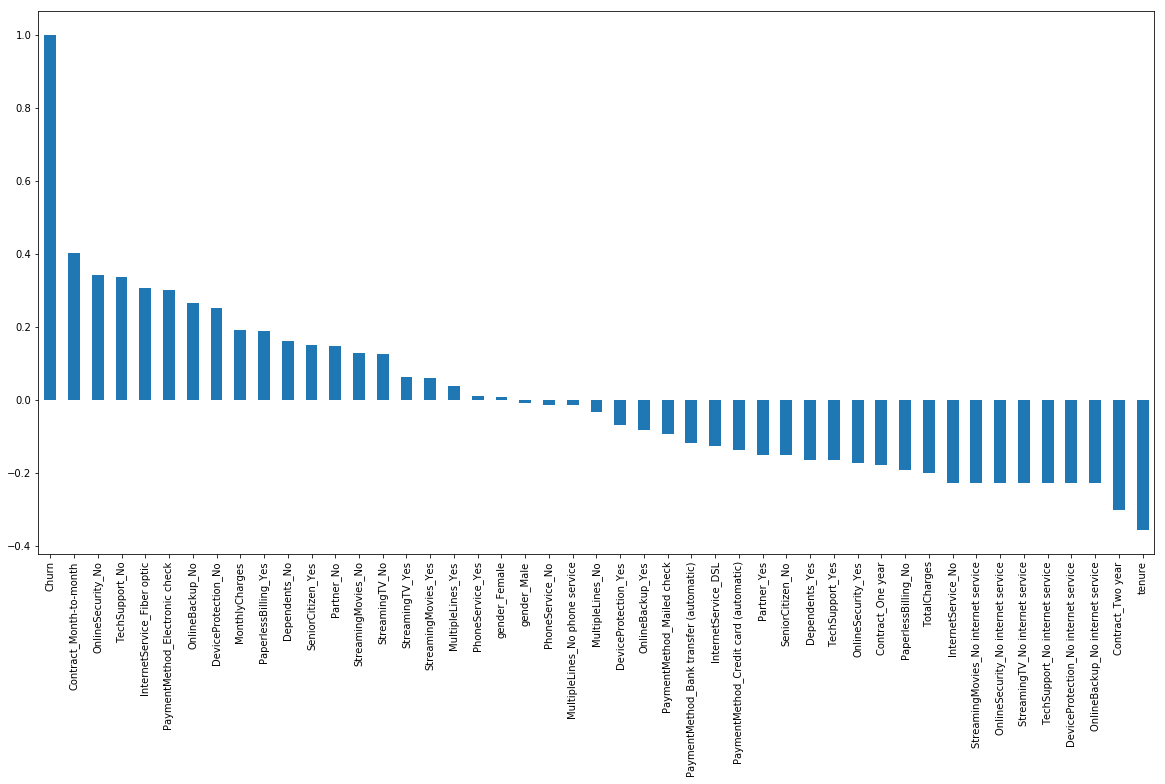

In [37]:
# correlation of Churn with other variables
plt.figure(figsize=(20,10))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [38]:
#correlation matrix
corr = df_dummies.corr()
corr.style.background_gradient(cmap='coolwarm')

### 2. Churns Distribution

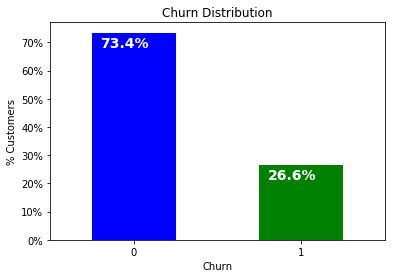

In [39]:
colors = ['blue','green']
val = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0,color = colors)
val.yaxis.set_major_formatter(mtick.PercentFormatter())
val.set_ylabel('% Customers')
val.set_xlabel('Churn')
val.set_title('Churn Distribution')

totals = []

for i in val.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in val.patches:
    val.text(i.get_x()+.05, i.get_height()-5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=14,
            color='white',
           weight = 'bold')

Looking at the distribution of the target variable, it can be found that 74% records for non-churn customers and 26 % of records are for churn customers.

### 3. Gender

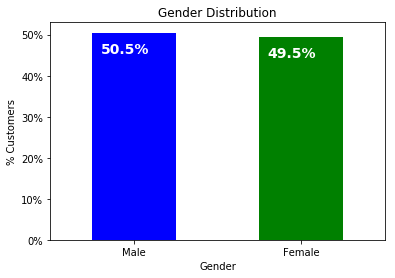

In [41]:
colors = ['blue','green']
val = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                       stacked = True,rot = 0,color = colors)
val.yaxis.set_major_formatter(mtick.PercentFormatter())
val.set_ylabel('% Customers')
val.set_xlabel('Gender')
val.set_ylabel('% Customers')
val.set_title('Gender Distribution')

totals = []

for i in val.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in val.patches:
    val.text(i.get_x()+.05, i.get_height()-5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=14,
            color='white',
           weight = 'bold')

### 4. Senior Citizens

Text(0.5, 1.0, '% of Senior Citizens')

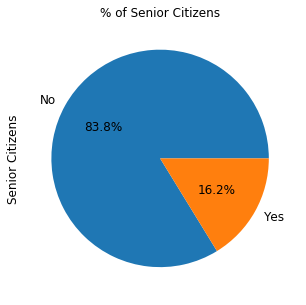

In [42]:
val = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
val.yaxis.set_major_formatter(mtick.PercentFormatter())
val.set_ylabel('Senior Citizens',fontsize = 12)
val.set_title('% of Senior Citizens', fontsize = 12)

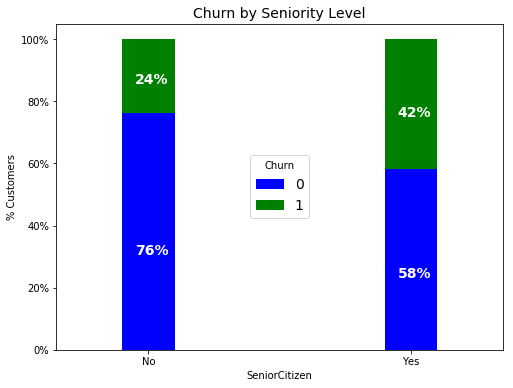

In [43]:
colors = ['blue','green']
senior_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

val = (senior_churn.T*100.0 / senior_churn.T.sum()).T.plot(kind='bar', width = 0.2,stacked = True, rot = 0,  figsize = (8,6),color = colors)
val.yaxis.set_major_formatter(mtick.PercentFormatter())
val.legend(loc='center',prop={'size':14},title = 'Churn')
val.set_ylabel('% Customers')
val.set_title('Churn by Seniority Level',size = 14)

for i in val.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    val.annotate('{:.0f}%'.format(height), (i.get_x()+.25*width, i.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

### 5. Dependents and Partners

#### 5.1 Dependents & Churn

In [44]:
pd.crosstab(df['Churn'], df['Dependents'],margins = True)

Dependents,No,Yes,All
Churn,,,
0,3390,1773,5163
1,1543,326,1869
All,4933,2099,7032


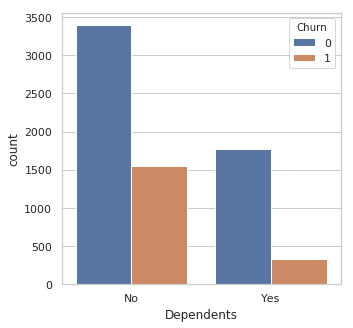

In [45]:
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid')
sns.countplot(df['Dependents'], hue=df['Churn'])
plt.show()

#### Churn rate is higher in customers who don't have dependents

#### 5.2 Dependents & Partner

In [46]:
pd.crosstab(df['Dependents'], df['Partner'],margins = True)

Partner,No,Yes,All
Dependents,,,
No,3280,1653,4933
Yes,359,1740,2099
All,3639,3393,7032


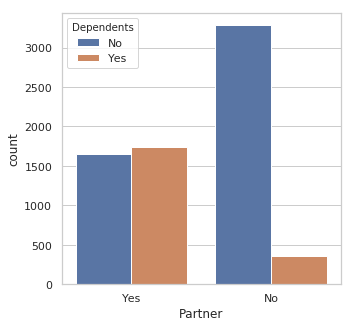

In [48]:
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid')
sns.countplot(df['Partner'], hue=df['Dependents'])
plt.show()

#### 5.3. Partner and Churn

In [49]:
pd.crosstab(df['Partner'], df['Churn'],margins = True)

Churn,0,1,All
Partner,,,
No,2439,1200,3639
Yes,2724,669,3393
All,5163,1869,7032


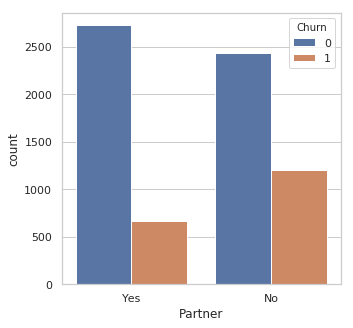

In [50]:
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid')
sns.countplot(df['Partner'], hue=df['Churn'])
plt.show()

Churn rate is higher for customers having no partners

### 7. Billing

In [51]:
pd.crosstab(df['PaperlessBilling'], df['Churn'],margins = True)

Churn,0,1,All
PaperlessBilling,,,
No,2395,469,2864
Yes,2768,1400,4168
All,5163,1869,7032


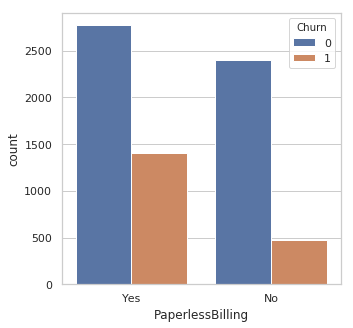

In [52]:
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid')
sns.countplot(df['PaperlessBilling'], hue=df['Churn'])
plt.show()

### 8. Contract Type

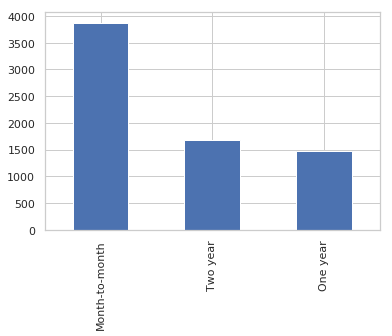

In [53]:
df['Contract'].value_counts().plot(kind='bar')

In [54]:
pd.crosstab(df['Contract'], df['Churn'],margins = True)

Churn,0,1,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1306,166,1472
Two year,1637,48,1685
All,5163,1869,7032


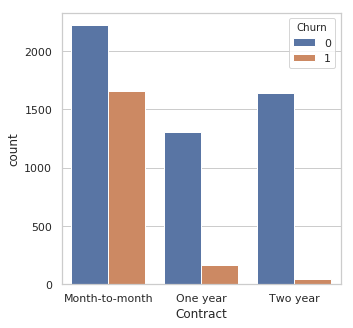

In [55]:
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid')
sns.countplot(df['Contract'], hue=df['Churn'])
plt.show()

#### 8.1 Contract & Dependent

In [56]:
pd.crosstab(df['Contract'], df['Dependents'],margins = True)

Dependents,No,Yes,All
Contract,,,
Month-to-month,3086,789,3875
One year,942,530,1472
Two year,905,780,1685
All,4933,2099,7032


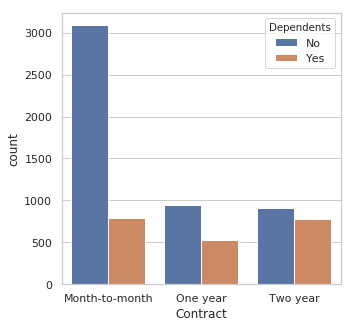

In [57]:
plt.figure(figsize = (5,5))
sns.set(style = 'whitegrid')
sns.countplot(df['Contract'], hue=df['Dependents'])
plt.show()

Text(0.5, 1.0, 'Two Year Contract')

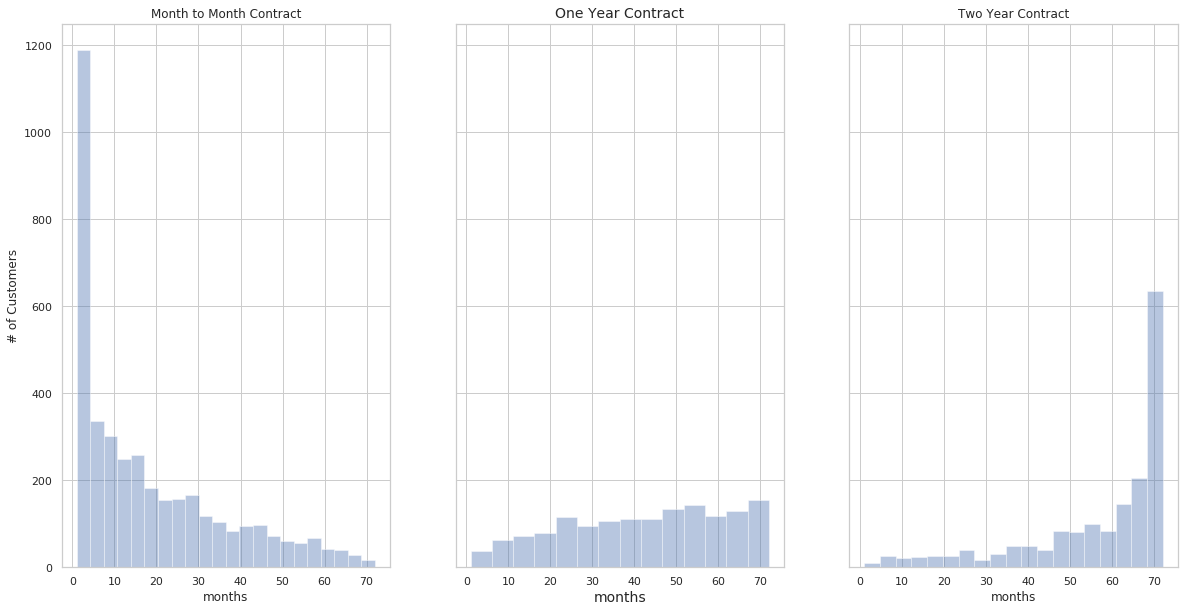

In [71]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,10))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True,kde=False, ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('months')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,ax=ax2)
ax.set_xlabel('months',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,ax=ax3)

ax.set_xlabel('months')
ax.set_title('Two Year Contract')

## Modeling

In [72]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
    
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Perceptron

In [74]:
from sklearn.linear_model import Perceptron

In [78]:
ppn_para = {'max_iter': [100, 300, 500, 1000, 1500, 2000], 'eta0': [0.001, 0.01, 0.05, 0.1, 0.5],
           'random_state': [0], 'tol': [0.001, 0.01, 0.05, 0.1, 0.5]}
ppn = GridSearchCV(estimator=Perceptron(), param_grid=ppn_para, scoring='accuracy', n_jobs=-1, cv=10)
ppn.fit(X_train_std, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Perceptron(alpha=0.0001, class_weight=None,
                                  early_stopping=False, eta0=1.0,
                                  fit_intercept=True, max_iter=1000,
                                  n_iter_no_change=5, n_jobs=None, penalty=None,
                                  random_state=0, shuffle=True, tol=0.001,
                                  validation_fraction=0.1, verbose=0,
                                  warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'eta0': [0.001, 0.01, 0.05, 0.1, 0.5],
                         'max_iter': [100, 300, 500, 1000, 1500, 2000],
                         'random_state': [0],
                         'tol': [0.001, 0.01, 0.05, 0.1, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
y_ppn_pred = ppn.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_ppn_pred))
print(confusion_matrix(y_test, y_ppn_pred))
print(classification_report(y_test,y_ppn_pred))
print('Best score:', ppn.best_score_)

Accuracy: 0.7360
[[1303  252]
 [ 305  250]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1555
           1       0.50      0.45      0.47       555

    accuracy                           0.74      2110
   macro avg       0.65      0.64      0.65      2110
weighted avg       0.73      0.74      0.73      2110

Best score: 0.7328321820398213


In [81]:
ppn.best_estimator_.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 0.05,
 'fit_intercept': True,
 'max_iter': 100,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
lr_para = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
lr = GridSearchCV(estimator=LogisticRegression(), param_grid=lr_para, scoring='accuracy', n_jobs=-1, cv=10)
lr.fit(X_train_std, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [85]:
y_lr_pred = lr.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_lr_pred))
print(confusion_matrix(y_test, y_lr_pred))
print(classification_report(y_test,y_lr_pred))
print('Best Params:',lr.best_params_)
print('Best score:', lr.best_score_)

Accuracy: 0.8014
[[1393  162]
 [ 257  298]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.65      0.54      0.59       555

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110

Best Params: {'C': 100.0, 'penalty': 'l1'}
Best score: 0.8065826899634295


In [86]:
lr.best_estimator_.get_params()

{'C': 100.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [87]:
lr_plot = LogisticRegression(penalty='l1', dual=False, tol=0.0001, 
                             C=10.0, fit_intercept=True, intercept_scaling=1, 
                             class_weight=None, random_state=None, solver='warn', 
                             max_iter=100, multi_class='warn', verbose=0, 
                             warm_start=False, n_jobs=None)

In [88]:
lr_plot.fit(X_train_std, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
y_lr_plot_pred = lr_plot.predict(X_test_std)

In [90]:
print('Accuracy: %.4f' % accuracy_score(y_test, y_lr_plot_pred))

Accuracy: 0.8005


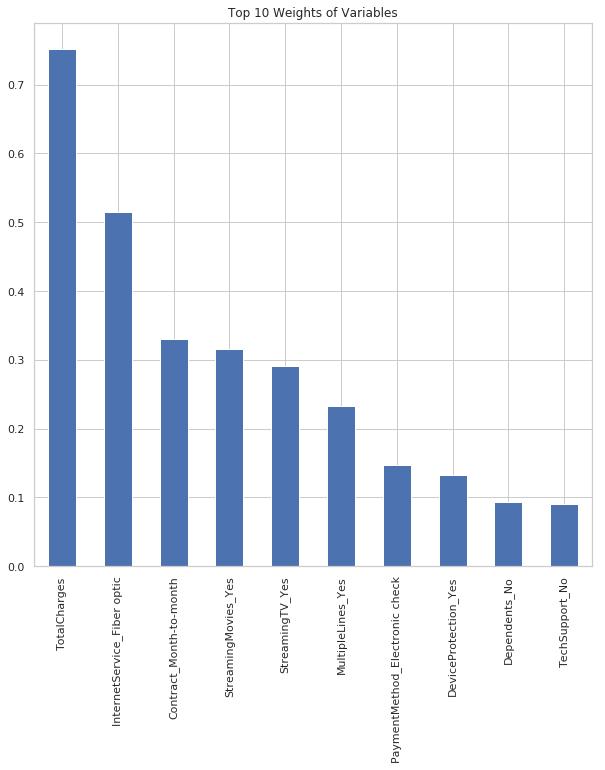

In [91]:
plt.figure(figsize=(10,10))
plt.title('Top 10 Weights of Variables')
weights = pd.Series(lr_plot.coef_[0],
                 index=X.columns.values)
weights.sort_values(ascending = False)[:10].plot(kind='bar')


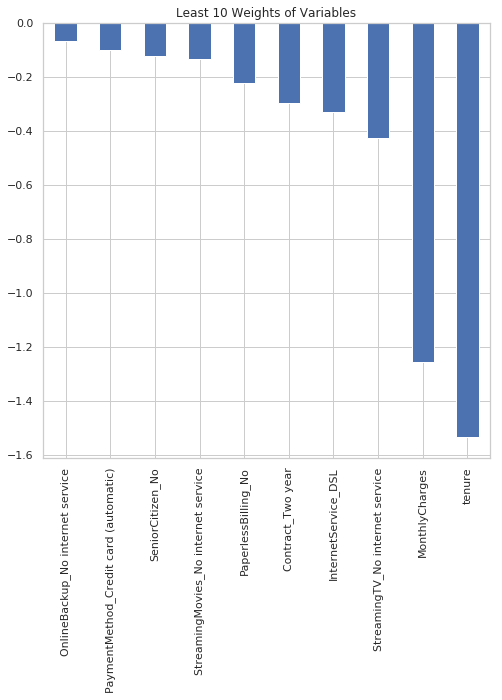

In [92]:
plt.figure(figsize=(8,8))
plt.title('Least 10 Weights of Variables')
weights.sort_values(ascending = False)[-10:].plot(kind='bar')

In [93]:
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

AUC: 0.84


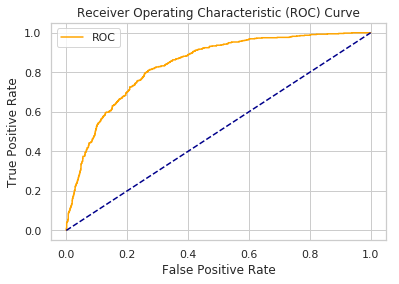

In [94]:

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

probs = lr.predict_proba(X_test_std)
probs=probs[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

### Support Vector Machine

In [95]:
from sklearn.svm import SVC

In [101]:
svm = SVC(kernel='linear') 
svm.fit(X_train_std,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [102]:
y_svm_pred = svm.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_svm_pred))
print(confusion_matrix(y_test, y_svm_pred))
print(classification_report(y_test,y_svm_pred))


Accuracy: 0.8019
[[1397  158]
 [ 260  295]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.65      0.53      0.59       555

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.80      2110



### Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
clf_param = {'max_depth':np.arange(1, 49),
             'criterion': ['gini', 'entropy']
            }
clf = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=clf_param, 
                   scoring='accuracy', n_jobs=-1, cv=10)

In [105]:
clf.fit(X_train_std, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  

In [106]:
y_clf_pred = svm.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_clf_pred))
print(confusion_matrix(y_test, y_clf_pred))
print(classification_report(y_test,y_clf_pred))
print('Best score:', clf.best_score_)

Accuracy: 0.8019
[[1397  158]
 [ 260  295]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.65      0.53      0.59       555

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.80      2110

Best score: 0.7923608289313288


In [107]:
clf.best_estimator_.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

### Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rfl = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)

In [110]:
rfl.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=0,
                       warm_start=False)

In [111]:
y_rfl_pred = rfl.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_rfl_pred))
print(confusion_matrix(y_test, y_rfl_pred))
print(classification_report(y_test,y_rfl_pred))

Accuracy: 0.7924
[[1423  132]
 [ 306  249]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1555
           1       0.65      0.45      0.53       555

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110



In [112]:
rfl_plot = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=1500,
                                 max_features=3, max_leaf_nodes=None,min_impurity_decrease=0.0,
                                 min_impurity_split=None, min_samples_leaf=3, min_samples_split=8,
                                 min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None, random_state=None,
                                 verbose=0, warm_start=False)
rfl_plot.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=1500, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
importances = rfl_plot.feature_importances_ 
indices = np.argsort(importances)[::-1]
feat_labels = df_dummies.columns[1:]

for f in range(X_train_std.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) MonthlyCharges                 0.141828
 2) Churn                          0.119656
 3) TotalCharges                   0.078589
 4) Contract_Month-to-month        0.067335
 5) TechSupport_No                 0.049428
 6) InternetService_Fiber optic    0.045291
 7) PaymentMethod_Electronic check 0.043853
 8) OnlineSecurity_No              0.033088
 9) Contract_Two year              0.025769
10) OnlineBackup_No                0.024587
11) PaperlessBilling_Yes           0.019720
12) Contract_One year              0.019106
13) InternetService_DSL            0.017890
14) PaperlessBilling_No            0.017676
15) TechSupport_Yes                0.017543
16) OnlineSecurity_Yes             0.016738
17) DeviceProtection_No            0.015680
18) PaymentMethod_Credit card (automatic) 0.012729
19) SeniorCitizen_Yes              0.012294
20) OnlineBackup_Yes               0.012019
21) gender_Female                  0.011886
22) MultipleLines_Yes              0.011156
23) gender_Male          

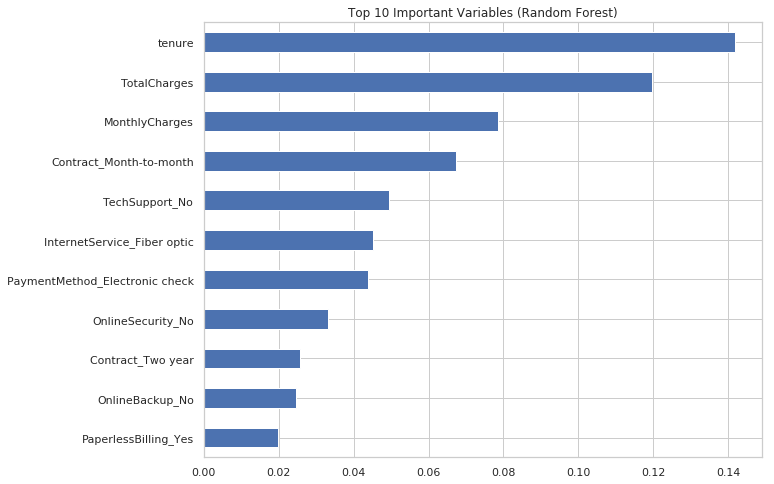

In [114]:
plt.figure(figsize=(10,8))
plt.title('Top 10 Important Variables (Random Forest)')
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-11:].plot(kind = 'barh')

### ADA Boost

In [115]:
from sklearn.ensemble import AdaBoostClassifier

In [116]:
ada = AdaBoostClassifier()
ada.fit(X_train_std,y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [117]:
y_ada_pred = ada.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_ada_pred))
print(confusion_matrix(y_test, y_ada_pred))
print(classification_report(y_test,y_ada_pred))

Accuracy: 0.8000
[[1400  155]
 [ 267  288]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1555
           1       0.65      0.52      0.58       555

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



### Gradient Boosting

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

In [119]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_std, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [120]:
y_gbc_pred = gbc.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_gbc_pred))
print(confusion_matrix(y_test, y_gbc_pred))
print(classification_report(y_test,y_gbc_pred))


Accuracy: 0.8019
[[1408  147]
 [ 271  284]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1555
           1       0.66      0.51      0.58       555

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



### Neural Network

In [121]:
from sklearn.neural_network import MLPClassifier

In [122]:
nn = MLPClassifier()
nn.fit(X_train_std, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [123]:
y_nn_pred = nn.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_nn_pred))
print(confusion_matrix(y_test, y_nn_pred))
print(classification_report(y_test,y_nn_pred))


Accuracy: 0.7716
[[1341  214]
 [ 268  287]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1555
           1       0.57      0.52      0.54       555

    accuracy                           0.77      2110
   macro avg       0.70      0.69      0.70      2110
weighted avg       0.76      0.77      0.77      2110



#### XGBoost

In [125]:
from xgboost import XGBClassifier

In [126]:
xgb = XGBClassifier()

In [127]:
xgb.fit(X_train_std, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [128]:
y_xgb_pred = xgb.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_xgb_pred))
print(confusion_matrix(y_test, y_xgb_pred))
print(classification_report(y_test,y_xgb_pred))


Accuracy: 0.8043
[[1410  145]
 [ 268  287]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1555
           1       0.66      0.52      0.58       555

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.80      2110



### Conclusion